In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the data frame
df = pd.read_csv('./Advertising.csv')
# Removing the id column
df = df.drop(columns=["id"])

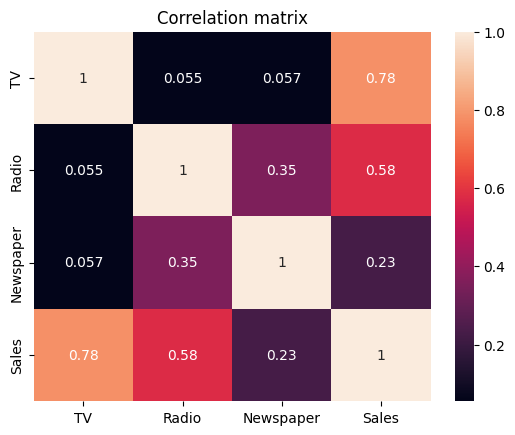

In [3]:
# Making the heatmap graph for the correlation matrix.
# Podemos ver, como la TV tiene mucha mas influencia
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation matrix")
plt.show()


TV vs sales
y = 0.04554414262586757 x + 7.2040971866810395
mean_squared_error :  8.0257608279724
mean_absolute_error :  2.1859544469201646
Radio vs sales
y = 0.18277761699814293 x + 9.62463926774533
mean_squared_error :  17.037461271032804
mean_absolute_error :  3.449192493775458
Newspaper vs sales
y = 0.03380944270336519 x + 12.931678188688622
mean_squared_error :  25.790924783927913
mean_absolute_error :  4.240757285741865


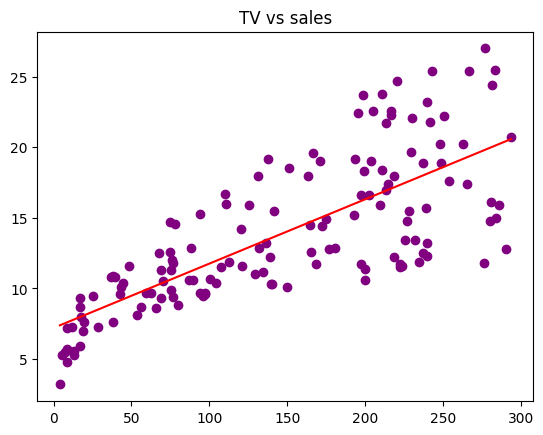

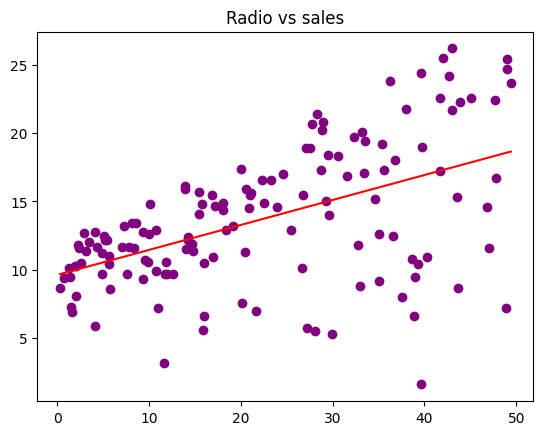

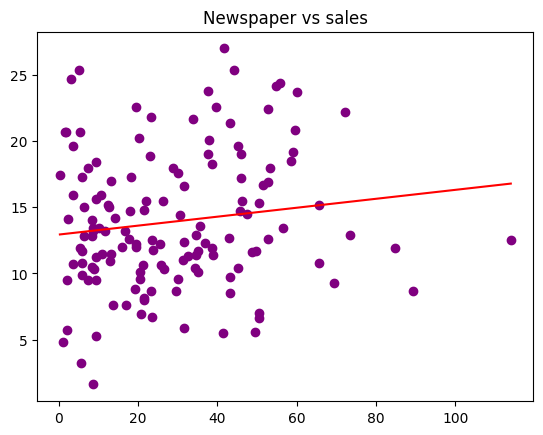

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

def linRegression(x,y,name):
    model = LinearRegression()
    # train_test_split() se usa para crear conjuntos de entrenamiento y prueba
    xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.3)
    # Hago la regresion lineal de tv vs ventas
    regr = model.fit(xTrain,yTrain)
    print(name)
    m= regr.coef_[0][0]
    b=regr.intercept_[0]
    print("y = " + str(m) + " x + " + str(b))

    predictions = model.predict(xTest)

    # error cuadratico medio y error absoluto medio
    print('mean_squared_error : ', mean_squared_error(yTest, predictions))
    print('mean_absolute_error : ', mean_absolute_error(yTest, predictions))
    x = np.linspace(xTrain.min(numeric_only=True),xTrain.max(numeric_only=True),len(xTrain))
    y = m*x + b
    fig, ax = plt.subplots()
    ax.scatter(xTrain, yTrain,  c='purple')
    ax.plot(x, y, '-r')
    ax.set_title(name)




# Hay que hacerlo doble pq skickit espera un array en 2D
tv = df[['TV']]
radio = df[['Radio']]
newspaper = df[["Newspaper"]]
sales = df[['Sales']]

linRegression(tv,sales, 'TV vs sales')
linRegression(radio,sales,'Radio vs sales')
linRegression(newspaper,sales, 'Newspaper vs sales')






In [12]:

x = df[['TV','Radio','Newspaper']]
sales = df[['Sales']]


# train_test_split() se usa para crear conjuntos de entrenamiento y prueba
xTrain, xTest, yTrain, yTest = train_test_split(x, sales, test_size=0.3)

model = LinearRegression()

# Hago la regresion lineal de tv vs ventas
regr = model.fit(xTrain,yTrain)

predictions = model.predict(xTest)
print("multiregression tv, radio, newspaper vs sales")
print("y = " +
      str(regr.coef_[0][0]) + " x1 + " + 
      str(regr.coef_[0][1]) + " x2 + " + 
      str(regr.coef_[0][2]) + " x3 + " + 
      str(regr.intercept_[0])
      ) 

# error cuadratico medio y error absoluto medio
print('mean_squared_error : ', mean_squared_error(yTest, predictions))
print('mean_absolute_error : ', mean_absolute_error(yTest, predictions))


multiregression tv, radio, newspaper vs sales
y = 0.04719330097493601 x1 + 0.18703844507125555 x2 + 0.0015713000512420083 x3 + 2.622900104487268
mean_squared_error :  2.897632492710493
mean_absolute_error :  1.3332317570303742
